In [1]:
import sys
sys.path.append('..')
import umbrella_mesh
import elastic_rods
import linkage_vis
from umbrella_mesh import UmbrellaEnergyType
from visualization_helper import *
import importlib, pipeline_helper

In [2]:
importlib.reload(pipeline_helper)
from pipeline_helper import allEnergies, allGradientNorms, allDesignObjectives, allDesignGradientNorms

In [3]:
import numpy as np
import numpy.linalg as la

In [4]:
import pickle, gzip

In [5]:
name = ''

In [6]:
input_path = '../../data/{}.json.gz'.format(name)

In [7]:
from load_jsondata import read_data
input_data, io = read_data(filepath = input_path)
import mesh
target_mesh = mesh.Mesh(input_data['target_v'], input_data['target_f'])

### Structural Analysis

In [8]:
initial_umbrella = pickle.load(gzip.open('../../data/pickles/hemisphere_5t_initial_deployment_2022_01_19_16_30.pkl.gz', 'r'))

In [9]:
import importlib
import stress_analysis
importlib.reload(stress_analysis)
stress_vis = stress_analysis.stressFieldVisualization(initial_umbrella, target_mesh)
stress_vis.showInitial()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

In [10]:
optim_zeta_1e3_umbrella = pickle.load(gzip.open('../../data/pickles/hemisphere_5t_optim_zeta_1000.0000000000001_2022_01_19_16_48.pkl.gz', 'r'))
optim_zeta_1e4_umbrella = pickle.load(gzip.open('../../data/pickles/hemisphere_5t_optim_zeta_9999.999999999998_2022_01_19_18_39.pkl.gz', 'r'))

In [11]:
optimView1 = stress_vis.getView(optim_zeta_1e3_umbrella)
optimView2 = stress_vis.getView(optim_zeta_1e4_umbrella)
from ipywidgets import HBox
HBox([stress_vis.initialView.show(), optimView1.show(), optimView2.show()])

In [12]:
cam_params = stress_vis.initialView.getCameraParams()
optimView1.setCameraParams(cam_params)
optimView2.setCameraParams(cam_params)

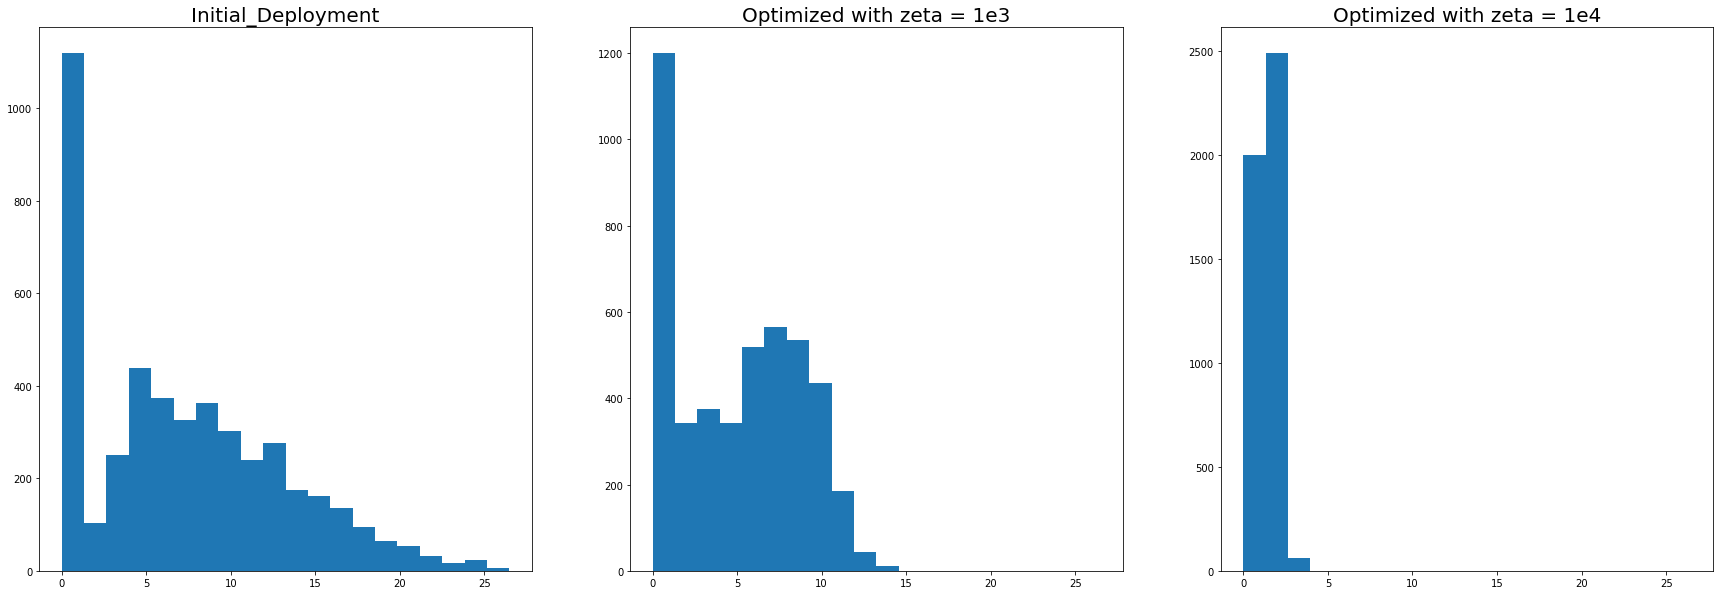

In [15]:
importlib.reload(stress_analysis)
stress_analysis.plotStressDistributions([initial_umbrella, optim_zeta_1e3_umbrella, optim_zeta_1e4_umbrella], ['Initial_Deployment', 'Optimized with zeta = 1e3', 'Optimized with zeta = 1e4'], stress_vis.vmin, stress_vis.vmax)

In [14]:
print(stress_vis.vmin, stress_vis.vmax)

0.0 26.466346250869055
